Crime Analysis dataset of San Francisco

Point 1

In [4]:
#DataSet Overview
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt 
import seaborn

In [5]:
df = pd.read_excel('SAN_FRANCISCO_data.xlsx')

In [6]:
df.Category.unique()
#df['Hour']=hour(df.Time)
df['Hour']=[t.hour for t in df.Time.values]


In [7]:
(df['Date'].values[0])

'08/31/2014'

In [8]:
nInc_day = df.groupby(['Category','Hour'])['IncidntNum'].count()


In [9]:
type(nInc_day)


pandas.core.series.Series

In [10]:
matrix_data = nInc_day.reset_index().values

In [11]:
nInc_day=nInc_day.fillna(0)

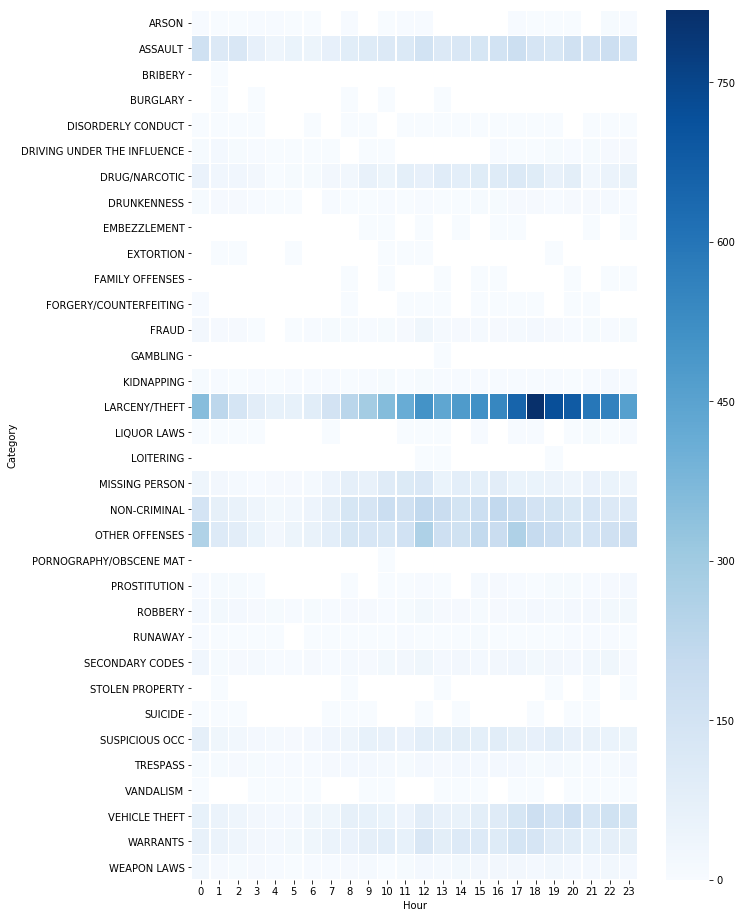

In [12]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_day.unstack(1),vmin=0,cmap="Blues",linewidths=.3,yticklabels =1, xticklabels=1 )

The figure show an heat map, the x axis rappresents the hours of the day and the y axis the different crimes in San Francisco.
The scale of the colors on the right reppresents the frequency of the crime, white--> frequncy=0, dark blue --> max frequency.
Observing the heat map it is possibile to note, that some crimes have the same frequency during the day, such as SUSPICIOUS OCC, SECONDARY CODE, WEAPON LAWS, ROBBERY and so on. THe LARCENTY/THEFT increase during the evening and the night, also the DRUG/NARCOTIC increases during the evening. The ASSULT are less frequent from 1 AM to 3 AM 

Analysis Crime in Seattle

In [13]:
df2 = pd.read_excel('SEATTLE_data.xlsx')

In [14]:
type(df2['Date Reported'][6])

datetime.datetime

In [15]:
format = '%m/%d/%Y %I:%M:%S %p'
dd_list = []
dd_list_start = []
dd_list_end = []
dd_list_month =[]
for t in range(len(df2['Date Reported'])):
    if isinstance (df2['Date Reported'][t],str):
        dd_list.append(dt.strptime(df2['Date Reported'][t],format))
        dd_list_month.append(dt.strptime(df2['Date Reported'][t],format).month)
    else :
        dd_list.append(df2['Date Reported'][t])
        dd_list_month.append(df2['Date Reported'][t].month)
for t in range(len(df2['Occurred Date or Date Range Start'])):
    if isinstance (df2['Occurred Date or Date Range Start'][t],str):
        dd_list_start.append(dt.strptime(df2['Occurred Date or Date Range Start'][t],format))
        
    else :
        dd_list_start.append(df2['Occurred Date or Date Range Start'][t])

for t in range(len(df2['Occurred Date Range End'])):
    if isinstance (df2['Occurred Date Range End'][t],str):
        dd_list_end.append(dt.strptime(df2['Occurred Date Range End'][t],format))
        
    else :
        dd_list_end.append(df2['Occurred Date Range End'][t])
        
df2['Date Reported']= dd_list
df2 ['Occurred Date or Date Range Start'] = dd_list_start
df2 ['Occurred Date Range End'] = dd_list_start
df2 ['Month'] = dd_list_month

In [16]:
df2['Summarized Offense Description'].unique()
#df['Hour']=hour(df.Time)
df2['Hour']=[t.hour for t in df2['Date Reported']]

In [17]:
nInc_day = df2.groupby(['Summarized Offense Description','Hour'])['RMS CDW ID'].count()
nInc_day=nInc_day.fillna(0)

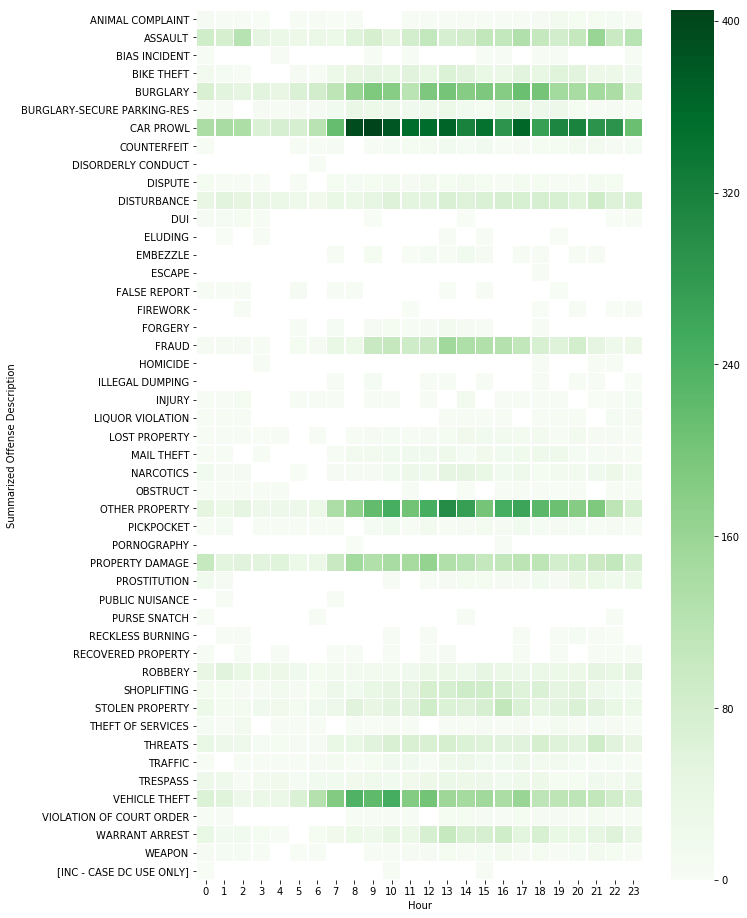

In [18]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_day.unstack(1),vmin=0,cmap="Greens",linewidths=.3,yticklabels =1, xticklabels=1 )

The figure show an heat map, the x axis rappresents the hours of the day and the y axis the different crimes in Seattle. The scale of the colors on the right reppresents the frequency of the crime, white--> frequncy=0, dark green --> max frequency. Observing the heat map it is possibile to note, that some crimes have the same frequency during the day, such as TRESPASS, BURGLARY-SECURE, DISTURBANCE and so on. The CAR PROWL, BURGLARY and OTHER PROPERTY increase during the evening and the night.The PROPERTY DEMAGE increases during the afternoon. The ROBBERY are more frequent fduring the night.

Point 2

SAN FRANCISCO

In [19]:
nInc_neigh = df.groupby(['Category','PdDistrict'])['IncidntNum'].count()
nInc_neigh=nInc_neigh.fillna(0)

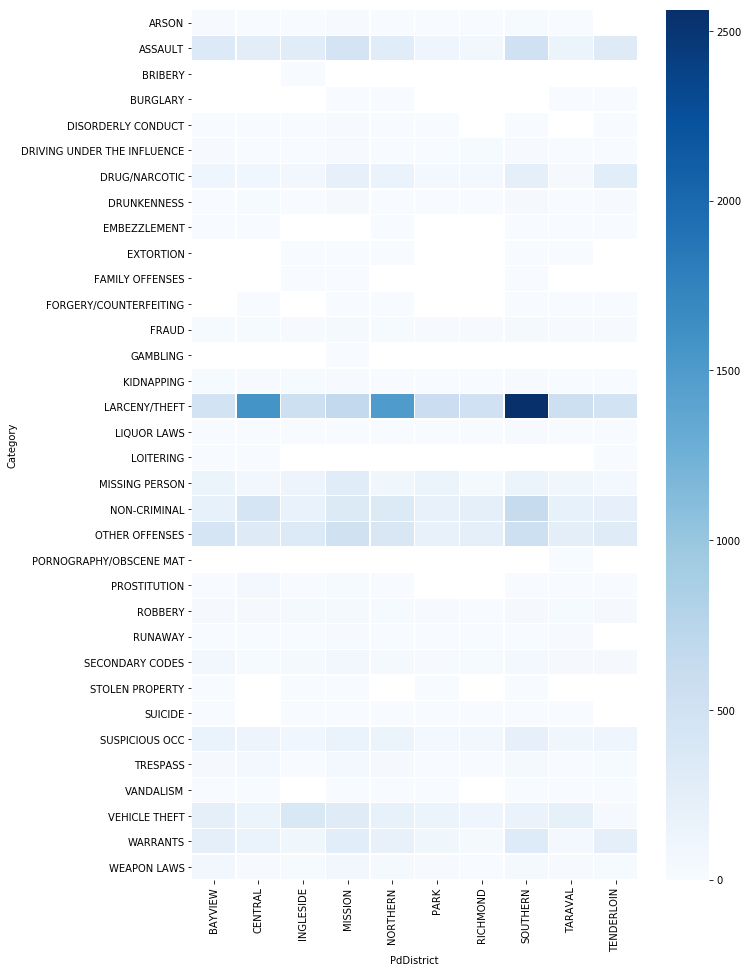

In [20]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_neigh.unstack(1),vmin=0,cmap="Blues",linewidths=.3,yticklabels =1, xticklabels=1 )

The figure show an heat map, the x axis rappresents the NEIGHBORHOOD and the y axis the different crimes in San Francisco. The scale of the colors on the right reppresents the frequency of the crime, white--> frequncy=0, dark blue --> max frequency. Observing the heat map it is possibile to note, that some crimes have the same frequency in all the city, such as WEAPON LAWS, TRESPASS,ROBBERY, FRAUD and so on. The most common incident in the city center is LERCENY/THEFT. The VEICLE THEFT are most common in INGLESIDE, MISSION, TRAVAL.

SEATTLE

In [21]:
nInc_neigh = df2.groupby(['Summarized Offense Description','District/Sector'])['RMS CDW ID'].count()
nInc_neigh=nInc_neigh.fillna(0)

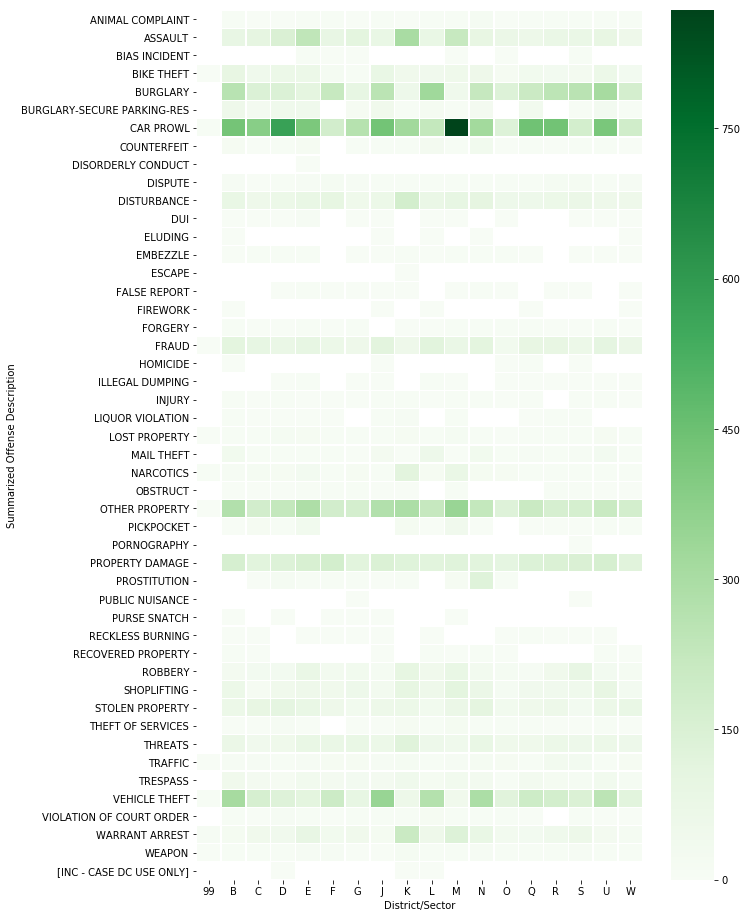

In [22]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_neigh.unstack(1),vmin=0,cmap="Greens",linewidths=.3,yticklabels =1, xticklabels=1 )

The figure show an heat map, the x axis rappresents the NEIGHBORHOOD and the y axis the different crimes in Seattle. The scale of the colors on the right reppresents the frequency of the crime, white--> frequncy=0, dark green --> max frequency. Observing the heat map it is possibile to note, that some crimes have the same frequency in all the city, such as TRAFFIC, TRESPASS, VOLATION OF COURT ORDER, WEAPON, DISPUTE and so on. Assume that the city center in rappresented by "C", than the most common incident in the city center is CAR PROWL. The ROBBERIES are most common in E,K M.

Point 3

SAN FRANCISCO 

In [23]:
format = '%m/%d/%Y'
dd_list = []

for t in range(len(df['Date'])):
    if isinstance (df['Date'][t],str):
        
        dd_list.append(dt.strptime(df['Date'][t],format).month)
        
    else :
        dd_list.append(df['Date'][t].month)
      
df['Month'] = dd_list


In [24]:
df_summer = df[(df.Month>=6) & (df.Month<=9) ]


In [25]:
nInc_month = df_summer.groupby(['Category','Month'])['IncidntNum'].count()
nInc_month=nInc_month.fillna(0)

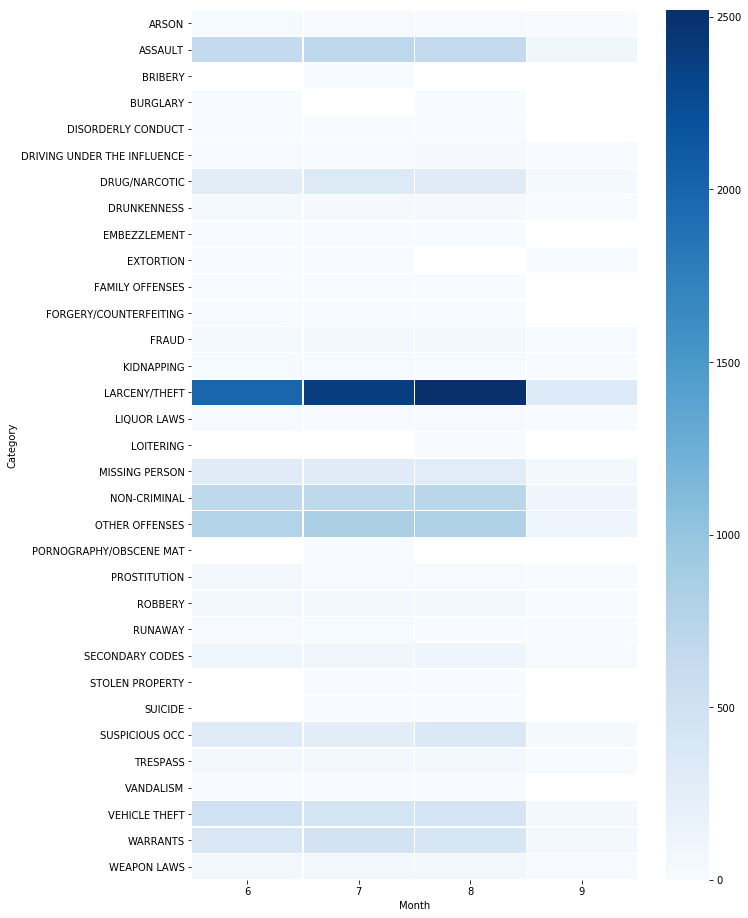

In [26]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_month.unstack(1),vmin=0,cmap="Blues",linewidths=.3,yticklabels =1, xticklabels=1 )

During June, July and August the most common incident is LARCENY/THEFT, but in general also VEHICLE THEFT WARRANTS SUSICIOUS OCC, NON CRIMINAL and Other OFFENS are more frequent during June, July and August.

SEATTLE

In [27]:
df2_summer = df2[(df2.Month>=6) & (df2.Month<=9)]

In [28]:
nInc_month = df2_summer.groupby(['Summarized Offense Description','Month'])['RMS CDW ID'].count()
nInc_month=nInc_month.fillna(0)

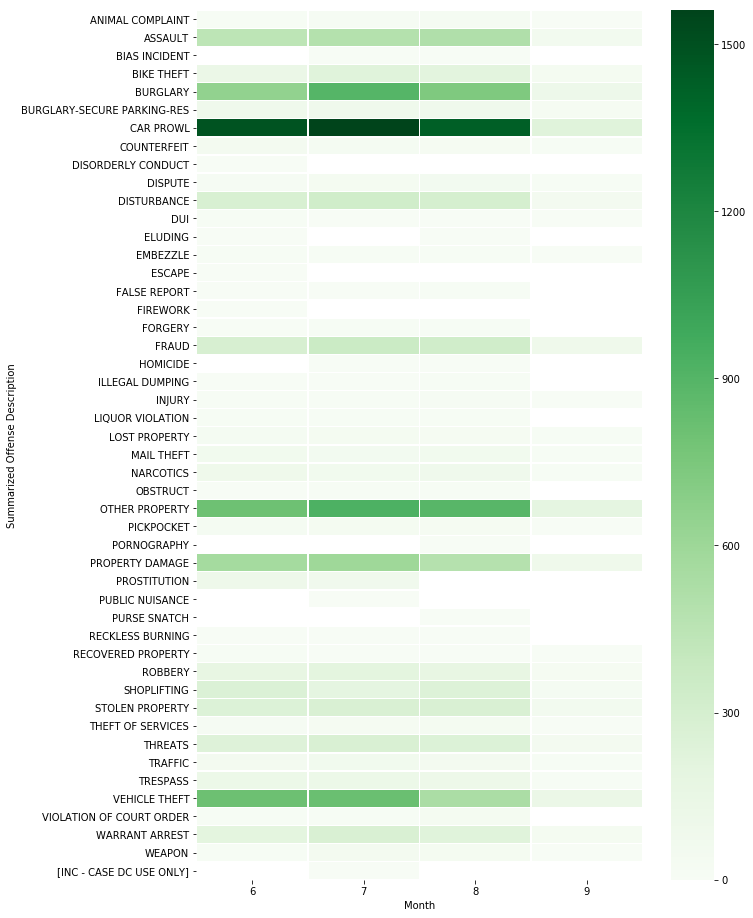

In [29]:
plt.figure(figsize=(10,16))
seaborn.heatmap(nInc_month.unstack(1),vmin=0,cmap="Greens",linewidths=.3,yticklabels =1, xticklabels=1 )

During June, July and August thee most common crime is ACR PROWL, but also OTHER PROPERTY. During June, July there are a lot of VEICLE THEFT. The BULGRARY is more frequent in July rather than the other momths.

Point 4

SAN FRANCISCO

In [30]:
nInc_corr = df.groupby(['Category','Date'])['IncidntNum'].count()
nInc_corr=nInc_corr.fillna(0)


In [31]:
matrix_data = nInc_corr.reset_index()

In [32]:
df_data = matrix_data.pivot_table('IncidntNum', ['Date'], 'Category')
df_data = df_data.fillna(0)


In [33]:
#plt.matshow(df_data.corr())
corr = df_data.corr()
corr.style.background_gradient(cmap=seaborn.diverging_palette(250, 10, as_cmap=True))

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,ROBBERY,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARSON,1,-0.0874279,0.270872,-0.00534048,-0.0836969,0.0638353,-0.0333873,-0.135051,0.044906,-0.0820599,0.161831,0.212879,-0.0588152,-0.0801171,0.0854575,0.0250148,-0.0293225,-0.0720147,-0.026892,-0.091721,-0.0769859,0.0368793,-0.0354028,0.126482,0.0577603,0.0912173,0.172489,-0.173569,-0.0623991,-0.0330404,0.0424678,0.0719247,0.100852,-0.0745855
ASSAULT,-0.0874279,1,-0.0469301,-0.00566772,0.100004,-0.0050313,-0.163491,0.17788,0.0363767,-0.00155943,0.0880807,-0.0972875,0.0334312,-0.216246,0.16346,0.26179,0.11709,0.00841633,0.144613,0.181738,-0.145478,-0.0328204,-0.102406,0.215173,0.0496026,0.128172,-0.0672067,-0.0705341,-0.0402773,-0.0365962,-0.0849775,0.168482,-0.0844619,-0.0941774
BRIBERY,0.270872,-0.0469301,1,-0.0276889,-0.0576363,-0.108585,0.15889,-0.044542,-0.0366077,-0.0300828,-0.0366077,-0.0414932,0.0215461,-0.010989,-0.0225965,0.07622,0.0782041,-0.0192462,-0.0148147,-0.047107,0.11495,-0.010989,-0.0318432,-0.11618,0.0397755,0.0543946,0.300969,-0.0300828,-0.0759739,0.190105,0.220184,-0.0436784,0.0765468,-0.0887896
BURGLARY,-0.00534048,-0.00566772,-0.0276889,1,-0.00156156,0.0200641,0.0304634,0.138079,0.0491947,-0.0757994,0.0491947,0.162633,-0.0436445,-0.0276889,0.0478265,-0.106664,-0.105093,-0.0484944,-0.0455052,-0.00105306,-0.0271655,-0.0276889,-0.0472814,0.122878,0.00107765,-0.0157824,-0.0722237,-0.0757994,0.34874,0.289289,0.214521,-0.179724,0.0609712,0.0789608
DISORDERLY CONDUCT,-0.0836969,0.100004,-0.0576363,-0.00156156,1,-0.0455615,-0.0464451,0.232796,-0.0210585,-0.157781,0.26385,-0.00234008,0.0538231,-0.0576363,-0.146655,0.0626229,0.118024,-0.00108542,-0.0612303,0.196221,0.00017984,-0.0576363,-0.0342495,-0.0232967,0.108759,0.108261,0.0727443,-0.124335,-0.143894,0.189067,-0.0789763,0.151392,-0.0124646,-0.116114
DRIVING UNDER THE INFLUENCE,0.0638353,-0.0050313,-0.108585,0.0200641,-0.0455615,1,0.0168101,0.119396,-0.0289384,-0.140985,0.00434077,-0.0956679,-0.0463376,-0.108585,0.0314382,0.324949,0.132914,0.101428,-0.0194069,0.18258,0.0604986,-0.108585,0.0807981,-0.140737,-0.0851992,-0.0289266,0.0424851,0.132492,-0.0600575,-0.0282812,-0.146207,-0.123778,-0.0522009,-0.0891804
DRUG/NARCOTIC,-0.0333873,-0.163491,0.15889,0.0304634,-0.0464451,0.0168101,1,0.0186297,-0.0575312,-0.0618504,0.0101814,-0.0360727,-0.0702659,0.00644399,-0.13025,-0.140459,0.0939719,-0.166711,-0.117886,0.0544041,0.440036,0.040321,0.112895,0.0349654,-0.270542,-0.118028,0.23772,0.126941,0.153932,0.0874785,-0.151743,-0.0827879,0.376108,0.00537291
DRUNKENNESS,-0.135051,0.17788,-0.044542,0.138079,0.232796,0.119396,0.0186297,1,-0.0491012,0.0237537,0.0501804,-0.168185,0.0916299,0.0299646,-0.067078,0.192204,0.232149,-0.034514,0.193934,0.399264,0.18589,-0.044542,0.0386375,-0.036944,-0.0214649,0.126602,-0.0918904,-0.165642,0.124889,0.00956413,0.0763743,0.172081,0.03737,-0.048268
EMBEZZLEMENT,0.044906,0.0363767,-0.0366077,0.0491947,-0.0210585,-0.0289384,-0.0575312,-0.0491012,1,-0.100215,-0.0097561,0.0737206,0.0911984,-0.0366077,-0.0198728,0.0203129,0.0687776,0.132504,-0.0752974,-0.014201,-0.184839,-0.0366077,-0.0450837,0.222902,0.0538565,-0.0309695,0.0143231,0.0314961,0.0298789,0.0313144,-0.0762838,-0.0718185,0.0787748,0.0883874


In the correlation matrix, the red cells reppresent the highiest correlation between two crimes. For instance PROSTITUTION is correlated to EXTORTION (47%) and OTHER OFFEN is correlated to DRUG (44%)

SEATTLE

In [39]:
df2['Dayofyear'] = [pd.to_datetime(i).timetuple().tm_yday for i in df2['Date Reported']]

In [40]:
nInc_corr = df2.groupby(['Summarized Offense Description','Dayofyear'])['RMS CDW ID'].count()
nInc_corr=nInc_corr.fillna(0)

In [43]:
matrix_data = nInc_corr.reset_index()

In [46]:
df_data = matrix_data.pivot_table('RMS CDW ID', ['Dayofyear'], 'Summarized Offense Description')
df_data = df_data.fillna(0)

In [47]:
corr = df_data.corr()
corr.style.background_gradient(cmap=seaborn.diverging_palette(125, 10, as_cmap=True))

In the correlation matrix, the red cells reppresent the highiest correlation between two crimes. For instance CAR PROWL is correlatd to OTHER PROPERTY (92%), CAR PROWL is also correlated to ASSULT. The matrix correlation of San Francisco a n Seattle are more differnt, in fact the crime in SEATTLE aere more correlated each other.